gpu 초기화

In [58]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

# Check if GPU is available
if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("No GPU Found")

# Create a TensorFlow session
with tf.Session() as sess:
    # Run a simple computation on the GPU
    with tf.device('/device:GPU:0'):
        a = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[2, 3], name='a')
        b = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[3, 2], name='b')
        c = tf.matmul(a, b)

        # Initialize the variables
        init = tf.global_variables_initializer()

        # Run the initialization
        sess.run(init)

        # Print the result of the computation
        print(sess.run(c))

Default GPU Device: /device:GPU:0
[[22. 28.]
 [49. 64.]]


따봉 동영상에서 이미지 추출.

In [59]:
import cv2
import os

def extract_frames(video_path, output_path):
    # Open the video file
    cap = cv2.VideoCapture(video_path)

    # Create the output directory if it doesn't exist
    os.makedirs(output_path, exist_ok=True)

    # Loop through each frame in the video
    frame_count = 0
    while cap.isOpened():
        # Read the next frame
        ret, frame = cap.read()

        # Break the loop if we have reached the end of the video
        if not ret:
            break

        # Save the frame as a JPG image
        output_file = os.path.join(output_path, f"frame{frame_count}.jpg")
        cv2.imwrite(output_file, frame)

        # Increment the frame count
        frame_count += 1

    # Release the video capture object and close all windows
    cap.release()
    cv2.destroyAllWindows()

In [60]:
extract_frames("./KakaoTalk_1.mp4", "./images/ddabong/")

In [61]:
extract_frames("./KakaoTalk_2.mp4", "./images/anddabong2/")

추출한 이미지를 반전 시켜서 안따봉으로 만든다.

In [62]:
from PIL import Image
import os

# specify the input and output directories
input_dir = './images/ddabong/'
output_dir = './images/anddabong/'

# create output directory if it does not exist
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# loop through all the files in the input directory
for file_name in os.listdir(input_dir):
    # check if file is an image file
    if file_name.endswith('.jpg') or file_name.endswith('.png'):
        # open the image file
        image = Image.open(os.path.join(input_dir, file_name))
        # flip the image vertically
        flipped_image = image.transpose(Image.FLIP_TOP_BOTTOM)
        # save the flipped image to the output directory
        flipped_image.save(os.path.join(output_dir, file_name))

C:\Users\SBAUser\AppData\Local\Temp\ipykernel_15780\4284990210.py:19: DeprecationWarning: FLIP_TOP_BOTTOM is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.FLIP_TOP_BOTTOM instead.
  flipped_image = image.transpose(Image.FLIP_TOP_BOTTOM)


In [63]:
from PIL import Image
import os

# specify the input and output directories
input_dir = './images/anddabong2/'
output_dir = './images/ddabong2/'

# create output directory if it does not exist
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# loop through all the files in the input directory
for file_name in os.listdir(input_dir):
    # check if file is an image file
    if file_name.endswith('.jpg') or file_name.endswith('.png'):
        # open the image file
        image = Image.open(os.path.join(input_dir, file_name))
        # flip the image vertically
        flipped_image = image.transpose(Image.FLIP_TOP_BOTTOM)
        # save the flipped image to the output directory
        flipped_image.save(os.path.join(output_dir, file_name))

C:\Users\SBAUser\AppData\Local\Temp\ipykernel_15780\2458863047.py:19: DeprecationWarning: FLIP_TOP_BOTTOM is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.FLIP_TOP_BOTTOM instead.
  flipped_image = image.transpose(Image.FLIP_TOP_BOTTOM)


따봉, 안따봉 이미지들을 복제해서 proceed_image에 넣는다.

In [64]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#이미지 조작.
augmentation = ImageDataGenerator(
                                  zoom_range=0.3, 
                                  width_shift_range=0.05, # 좌우 시프트 랜덤 적용
                                  height_shift_range=0.05, # 상하 시프트 랜덤 적용
                                  horizontal_flip=True, # 좌우 반전 랜덤 적용
                                  #vertical_flip=True, # 상하 반전 랜덤 적용 하면 따봉이 안따봉이 되니까 안된다.
                                  rotation_range=5 # 랜덤 회전 적용
                                  ) 

In [65]:
i = 0
# 따봉 이미지 생성.
for batch in augmentation.flow_from_directory('./images', classes=['ddabong'], # ▶▶원본 이미지 저장 폴더
                               batch_size=1,
                               save_to_dir='./processed_images/ddabong/',
                               target_size=(128,72),# ▶▶변형/조작된 이미지 저장 폴더
                               save_prefix='img', # 저장할 이미지 파일명 앞 부분
                               save_format='jpg'): # 저장할 이미지 포맷
    i += 1
    if i >= 5000:
        break  # 이미지 5000장을 생성하고 마칩니다(생성 숫자 조정 가능)

Found 719 images belonging to 1 classes.


In [66]:
i = 0
# 따봉 이미지 생성.
for batch in augmentation.flow_from_directory('./images', classes=['anddabong'], # ▶▶원본 이미지 저장 폴더
                            batch_size=1,
                            save_to_dir='./processed_images/anddabong/',
                            target_size=(128,72),
                            # ▶▶변형/조작된 이미지 저장 폴더
                            save_prefix='img', # 저장할 이미지 파일명 앞 부분
                            save_format='jpg'): # 저장할 이미지 포맷
    i += 1
    if i >= 5000:
        break  # 이미지 5000장을 생성하고 마칩니다(생성 숫자 조정 가능)

Found 719 images belonging to 1 classes.


In [67]:
i = 0
# 따봉 이미지 생성.
for batch in augmentation.flow_from_directory('./images', classes=['ddabong2'], # ▶▶원본 이미지 저장 폴더
                               batch_size=1,
                               save_to_dir='./processed_images/ddabong/',
                               target_size=(128,72),# ▶▶변형/조작된 이미지 저장 폴더
                               save_prefix='img', # 저장할 이미지 파일명 앞 부분
                               save_format='jpg'): # 저장할 이미지 포맷
    i += 1
    if i >= 5000:
        break  # 이미지 5000장을 생성하고 마칩니다(생성 숫자 조정 가능)

Found 472 images belonging to 1 classes.


In [68]:
i = 0
# 따봉 이미지 생성.
for batch in augmentation.flow_from_directory('./images', classes=['anddabong2'], # ▶▶원본 이미지 저장 폴더
                            batch_size=1,
                            save_to_dir='./processed_images/anddabong/',
                            target_size=(128,72),
                            # ▶▶변형/조작된 이미지 저장 폴더
                            save_prefix='img', # 저장할 이미지 파일명 앞 부분
                            save_format='jpg'): # 저장할 이미지 포맷
    i += 1
    if i >= 5000:
        break  # 이미지 5000장을 생성하고 마칩니다(생성 숫자 조정 가능)

Found 472 images belonging to 1 classes.


배경을 지운 이미지를 넣어서 두배로 불린다.

In [69]:
# #따봉 이미지.

# # Load the pre-trained model for background removal
# model = cv2.createBackgroundSubtractorMOG2()

# # Define the input and output directories
# input_dir = "./processed_images/ddabong/"
# output_dir = "./processed_images/ddabong/"

# # Iterate through each file in the input directory
# for filename in os.listdir(input_dir):
#     if filename.endswith(".jpg") or filename.endswith(".png"):
#         # Load the image
#         image = cv2.imread(os.path.join(input_dir, filename))

#         # Apply the background removal model
#         fg_mask = model.apply(image)

#         # Remove the background from the image
#         fg_image = cv2.bitwise_and(image, image, mask=fg_mask)

#         # Save the output image to the output directory
#         cv2.imwrite(os.path.join(output_dir, "x"+filename), fg_image)

In [70]:
# # 안따봉 이미지.

# # Load the pre-trained model for background removal
# model = cv2.createBackgroundSubtractorMOG2()

# # Load the pre-trained model for background removal
# model = cv2.createBackgroundSubtractorMOG2()

# # Define the input and output directories
# input_dir = "./processed_images/anddabong/"
# output_dir = "./processed_images/anddabong/"

# # Iterate through each file in the input directory
# for filename in os.listdir(input_dir):
#     if filename.endswith(".jpg") or filename.endswith(".png"):
#         # Load the image
#         image = cv2.imread(os.path.join(input_dir, filename))

#         # Apply the background removal model
#         fg_mask = model.apply(image)

#         # Remove the background from the image
#         fg_image = cv2.bitwise_and(image, image, mask=fg_mask)

#         # Save the output image to the output directory
#         cv2.imwrite(os.path.join(output_dir, "x"+filename), fg_image)

데이터가 마련되었으니 전처리를 시작한다.

gpu 초기화

In [71]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

# Check if GPU is available
if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("No GPU Found")

# Create a TensorFlow session
with tf.Session() as sess:
    # Run a simple computation on the GPU
    with tf.device('/device:GPU:0'):
        a = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[2, 3], name='a')
        b = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[3, 2], name='b')
        c = tf.matmul(a, b)

        # Initialize the variables
        init = tf.global_variables_initializer()

        # Run the initialization
        sess.run(init)

        # Print the result of the computation
        print(sess.run(c))

Default GPU Device: /device:GPU:0
[[22. 28.]
 [49. 64.]]


In [72]:
import numpy as np
import glob
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# 클래스 정의
img_00 = "./processed_images/ddabong" # 클래스 0번 (가위)
img_01 = "./processed_images/anddabong" # 클래스 1번 (바위)

ver = 128 # (이미지 리사이즈 후) 세로 픽셀수
hor = 72 # (이미지 리사이즈 후) 가로 픽셀수

X_all = [] # 속성 데이터가 들어갈 변수 생성
Y_all = [] # 정답 클래스가 들어갈 변수 생성

#0000000000000000000000000000000000
# 클래스 0번 속성 생성
files_00 = sorted(glob.glob(img_00 + "/*.jpg"))
num_00 = len(files_00)
X = [] # 비어있는 배열 생성

for i, filepath in enumerate(files_00):
    img = image.load_img(filepath,                # 이미지의 실제 경로
                         color_mode='grayscale',  # 이미지를 색으로 불러오기
                         target_size = (ver, hor)) # 사이즈로 이미지 불러오기
    img_array = image.img_to_array(img) # 이미지를 배열 형식으로 변환
    X.append(img_array) # 이미지를 하나씩 추가하여 한 클래스의 이미지 셋(집합) 생성
    
X_00 = np.array(X) # 한 클래스의 이미지 셋을 배열 형태로 변환

# 클래스 0번 정답 클래스 생성
Y_00 = 0 * np.ones(num_00)
#0000000000000000000000000000000000


#1111111111111111111111111111111111
# 클래스 1번 속성 생성
files_01 = sorted(glob.glob(img_01 + "/*.jpg"))
num_01 = len(files_01)
X = [] # 비어있는 배열 생성

for i, filepath in enumerate(files_01):
    img = image.load_img(filepath,                # 이미지의 실제 경로
                         color_mode='grayscale',  # 이미지를 무조건 흑백으로 불러오기
                         target_size = (ver, hor)) # 세로50픽셀x가로100픽셀 사이즈로 이미지 불러오기
    img_array = image.img_to_array(img) # 이미지를 배열 형식으로 변환
    X.append(img_array) # 이미지를 하나씩 추가하여 한 클래스의 이미지 셋(집합) 생성
    
X_01 = np.array(X) # 한 클래스의 이미지 셋을 배열 형태로 변환

# 클래스 1번 정답 클래스 생성
Y_01 = 1 * np.ones(num_01)
#1111111111111111111111111111111111



# 속성 및 정답 클래스 합치기
X_all = np.concatenate((X_00, X_01), axis=0) # 모든 클래스 속성 합치기
Y_all = np.concatenate((Y_00, Y_01), axis=0) # 모든 클래스 정답 합치기

# 학습셋과 테스트셋의 구분
from sklearn.model_selection import train_test_split

# 학습셋과 테스트셋의 구분
x_train, x_test, y_train, y_test = train_test_split(X_all, Y_all, test_size=0.3, random_state=2)


# Split the data into training and validation sets
x_train, x_val,  y_train, y_val = train_test_split(
    x_train, y_train, test_size=0.2, random_state=7)

전처리가 끝났으니, 모델링을 시작하자.

In [73]:
     
#============================================
# 딥러닝 모델 생성 관련 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam
# 정답 데이터 변환(전처리) 관련
from tensorflow.keras import utils
import numpy as np
from sklearn.model_selection import KFold
from tensorflow.keras.applications import VGG16

# 데이터 셋 불러오기에 사용
import numpy as np
#============================================

# Reshape the images to be 4-dimensional (batch_size, height, width, channels)



x_train_encoded = x_train.astype('float16')/ 255.0 
x_val_encoded = x_val.astype('float16') / 255.0
x_test_encoded = x_test.astype('float16')/ 255.0

# Convert target variables to one-hot encoded format
y_train_onehot = tf.keras.utils.to_categorical(y_train, num_classes=2)
y_val_onehot = tf.keras.utils.to_categorical(y_val, num_classes=2)
y_test_onehot = tf.keras.utils.to_categorical(y_test, num_classes=2)



# VGG = VGG16(input_shape=(128,72,3), include_top = False, weights = 'imagenet')
# # include_top = False >> 모델링만 가져오기 위함 
# VGG.trainable = True # 1 False # 2      
# # trainable = True 학습(훈련)하여 업데이트 함 # trainable = False 학습 하지 않고 분류기로만 사용 
# model = Sequential()
# model.add(VGG)
# model.add(Flatten())
# model.add(Dense(units=256,activation="relu"))
# model.add(Dense(units=256,activation="relu"))
# model.add(Dense(units=2, activation="softmax"))

# from keras.optimizers import Adam

# model.compile(optimizer='adam', loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])
# model.summary()

model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 72, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dropout(0.5),  # Add dropout layer
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),  # Add dropout layer
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),  # Add dropout layer
    layers.Dense(2, activation='softmax')  # Change the output layer to have 2 units for one-hot encoding
])


# model = keras.Sequential([
#     layers.Conv2D(16, (3, 3), activation='relu', input_shape=(128, 72, 1)),
#     layers.MaxPooling2D((2, 2)),
#     layers.Conv2D(32, (3, 3), activation='relu'),
#     layers.MaxPooling2D((2, 2)),
#     layers.Conv2D(32, (3, 3), activation='relu'),
#     layers.Flatten(),
#     layers.Dense(16, activation='relu'),
#     layers.Dense(2, activation='softmax')
# ])

model.summary()

# Compile the model

model.compile(optimizer="Adam",
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train_encoded, y_train_onehot, epochs=1, batch_size=3, validation_data=(x_val_encoded, y_val_onehot))

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test_encoded, y_test_onehot)
print('Test accuracy:', test_acc)

model.save('my_model.h5')

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 126, 70, 32)       320       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 63, 35, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 61, 33, 32)        9248      
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 30, 16, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 28, 14, 64)        18496     
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 14, 7, 64)       

C:\Users\SBAUser\AppData\Roaming\Python\Python39\site-packages\keras\engine\training_v1.py:2332: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


11200/11200 [==============================] - 18s 2ms/sample - loss: 0.2213 - acc: 0.8888 - val_loss: 0.0282 - val_acc: 0.9918
Test accuracy: 0.9916667


In [74]:

# # define the number of folds
# k = 5
# num_val_samples = len(x_train_encoded) // k

# # shuffle the data
# indices = np.arange(len(x_train_encoded))
# np.random.shuffle(indices)
# x_train_encoded = x_train_encoded[indices]
# y_train = y_train[indices]

# # define the k-fold cross-validator
# kfold = KFold(n_splits=k)

# # loop over the folds
# fold_accs = []
# for fold, (train_indices, val_indices) in enumerate(kfold.split(x_train_encoded)):
#     print('Fold', fold+1)
#     # select the training and validation data for this fold
#     x_train_fold = x_train_encoded[train_indices]
#     y_train_fold = y_train_onehot[train_indices]
#     x_val_fold = x_train_encoded[val_indices]
#     y_val_fold = y_train_onehot[val_indices]
    
#     # build the model
#     model = keras.Sequential([
#         layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 72, 1)),
#         layers.MaxPooling2D((2, 2)),
#         layers.Conv2D(64, (3, 3), activation='relu'),
#         layers.MaxPooling2D((2, 2)),
#         layers.Conv2D(64, (3, 3), activation='relu'),
#         layers.Flatten(),
#         layers.Dropout(0.5),
#         layers.Dense(64, activation='relu'),
#         layers.Dropout(0.5),
#         layers.Dense(2, activation='softmax')
#     ])

#     # compile the model
#     model.compile(optimizer='adam',
#                   loss='categorical_crossentropy',
#                   metrics=['accuracy'])

#     # train the model for this fold
#     history = model.fit(x_train_fold, y_train_fold, epochs=1, validation_data=(x_val_fold, y_val_fold))
    
#     # evaluate the model on the test set for this fold
#     fold_loss, fold_acc = model.evaluate(x_test_encoded, y_test, verbose=0)
#     print('Fold', fold+1, 'accuracy:', fold_acc)
#     fold_accs.append(fold_acc)

# # calculate the mean and standard deviation of the test accuracies across all folds
# mean_acc = np.mean(fold_accs)
# std_acc = np.std(fold_accs)
# print('Mean test accuracy:', mean_acc)
# print('Standard deviation of test accuracy:', std_acc)


예측해보자.

In [4]:
#============================================
# 데이터 셋 준비

import numpy as np


#===============================
# 저장했던 딥러닝 모델 불러오기
from tensorflow.keras.models import load_model  # 모델 불러오기 라이브러리
model = load_model('my_model.h5') # 모델을 새로 불러옴
#===============================

#===============================
# 속성(이미지)을 불러온 딥러닝 모델에 입력하여 예측값 획득
import numpy as np

index = 150 # 샘플 이미지 선택
x_input = x_test_encoded[index,:] # 테스트 셋에서 샘플 이미지 하나를 선택
x_input = x_input.reshape(1, 128, 72, 1) 
# 1 : 1장의 이미지를 입력
# 50, 100 : 50x100 크기의 이미지를 의미
# 1 : 흑백 이미지를 의미(3 : RGB 컬러 이미지를 의미)

prediction = model.predict(x_input) # 예측 수행
#softmax_sum = np.sum(prediction) # 소프트맥스 출력의 총 합은 1이어야 함
#===============================



# 클래스 이름
fashion_class = {
      0: '좋아요'
    , 1: '싫어요'
}

#===============================
# 예측값이 맞는지 확인
class_predicted = np.argmax(prediction) # 클래스(예측)
class_actual = y_test[index]            # 클래스(정답)

class_predicted_name = fashion_class[class_predicted] # 클래스 이름(예측)
class_actual_name = fashion_class[class_actual] # 클래스 이름(정답)


print("클래스(예측) : %s" %class_predicted_name) # 클래스 이름(예측) 출력
print("클래스(정답) : %s" %class_actual_name) # 클래스 이름(정답) 출력

import matplotlib.pyplot as plt
test_img = x_test[index].astype(np.uint8)
plt.imshow(test_img, cmap=plt.cm.gray) # 샘플 이미지 표시
plt.show()
#=============================== 



NameError: name 'x_test_encoded' is not defined

예측이 잘되는 걸 보았으니 아무 사진이나 넣어보자.

In [1]:
import numpy as np
from PIL import Image
import tensorflow as tf
import os
from tensorflow.keras.models import load_model 
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

model = tf.keras.models.load_model("my_model.h5")
#아무 이미지를 받아서 알려주는 코드

def goodorbad(filepath):
  img = image.load_img(filepath,                # 이미지의 실제 경로
                        color_mode='grayscale',  # 이미지를 색으로 불러오기
                        target_size = (128, 72))
  plt.imshow(img, cmap=plt.cm.gray)# 사이즈로 이미지 불러오기
  plt.show()
  img_array = image.img_to_array(img) / 255.0
  # Load image and resize to 128x72 pixels
  # Reshape array to match input shape of the model
  x = img_array.reshape(1, 128, 72, 1) 

  # Load saved model
 

  # Make prediction on input image
  pred = model.predict(x)

  fashion_class = {
      0: '좋아요'
    , 1: '싫어요'
  }

  class_predicted_name = fashion_class[np.argmax(pred)]

# Print predicted class (0 for thumb down, 1 for thumb up)
  return print("Prediction:", class_predicted_name)

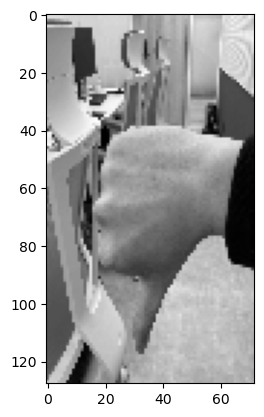

1/1 [==============================] - 2s 2s/step
Prediction: 싫어요


In [15]:
goodorbad("./1.jpg")

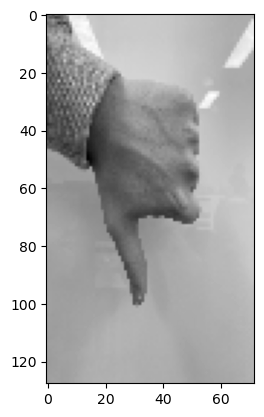

Prediction: 싫어요


In [78]:
goodorbad("./2.jpg")

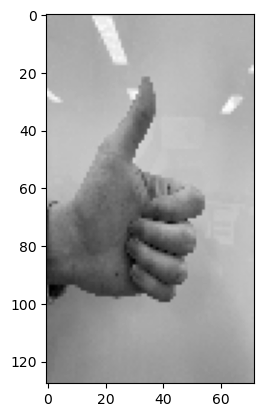

Prediction: 좋아요


In [79]:
goodorbad("./3.jpg")

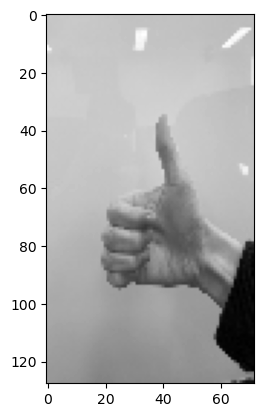

Prediction: 좋아요


In [80]:
goodorbad("./4.jpg")

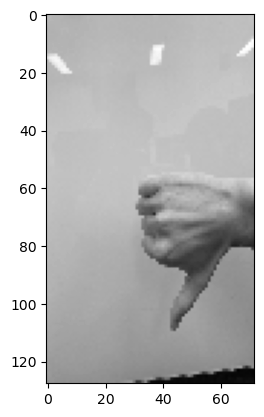

Prediction: 싫어요


In [81]:
goodorbad("./5.jpg")

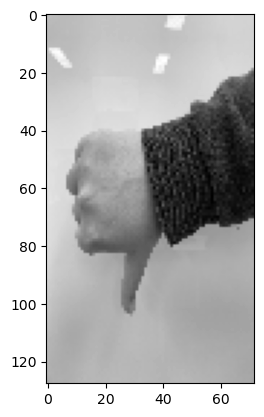

Prediction: 싫어요


In [82]:
goodorbad("./6.jpg")

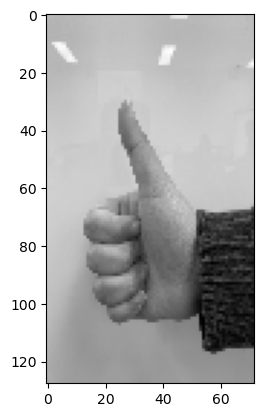

Prediction: 좋아요


In [83]:
goodorbad("./7.jpg")

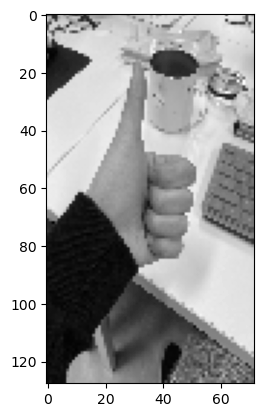

Prediction: 좋아요


In [84]:
goodorbad("./8.jpg")

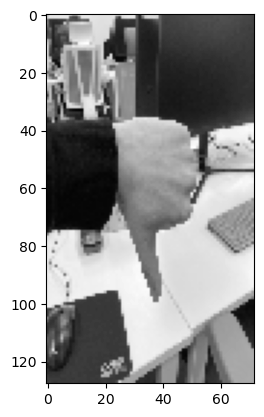

Prediction: 싫어요


In [85]:
goodorbad("./9.jpg")

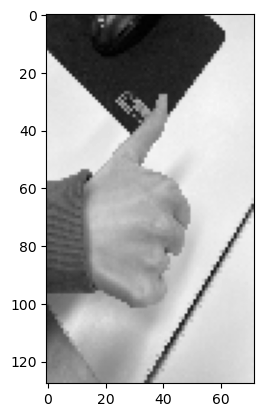

Prediction: 좋아요


In [89]:
goodorbad("./10.jpg")

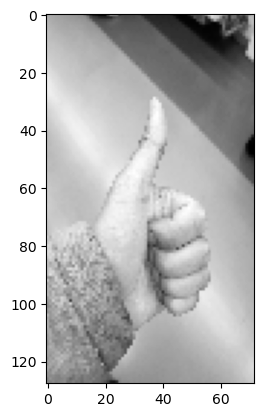

1/1 [==============================] - 0s 12ms/step
Prediction: 좋아요


In [18]:
goodorbad("./11.jpg")


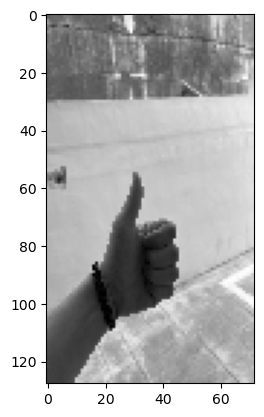

1/1 [==============================] - 0s 14ms/step
Prediction: 좋아요


In [19]:
goodorbad("./12.jpg")

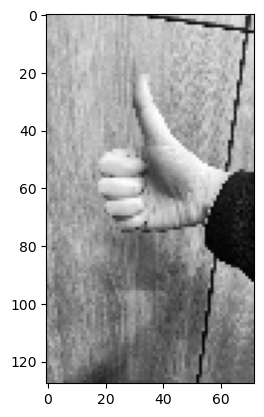

1/1 [==============================] - 2s 2s/step
Prediction: 좋아요


In [3]:
goodorbad("./13.jpg")